# Sensicorn Suport Data

To interpret the data collected by the project we need some context. This notebook builds and views that contextual data.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry.polygon import LinearRing

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15)

# Graph for movement

We have a traversable graph that can be used for working out (approx) shortest paths between two places. It's also going to be useful in generating a graph based probability of where someone is now based on where they were the step before.

`TODO: ARR to help write up the graph generation process`


* Drawing the graph takes a very long time!
* Writing the graph files only takes 2.5 seconds for ~50k edges (I'm quite pleased about that!)
* Constructing the graph only takes 2-3 seconds, and I think most of that is file loading.


There are two files, one has nodes and the other has edges.

Nodes rows look like: `(0, {'x':64852, 'y':-16490})`

and Edge rows like this: `(431, 436, {'weight': 340})`

Edge weights can be tuned in grasshopper to account for _creepy factor_ for now, but eventually it'd be good to tune them automatically. The `x` and `y` attributes are so that we can draw the graph as it's constructed to be sure that it all works.

In [2]:
f = open('nodes.g', 'r')
nodes = f.readlines()
f.close()
nodes = [eval(n) for n in nodes]

OG = nx.Graph()
for n in nodes:
    OG.add_node(*n)
    
print OG.number_of_nodes(), "nodes"

10242 nodes


Now that we have the nodes, and their spatial attributes, we can plot them to check that we're dealing with something real:

In [3]:
f = open('edges.g', 'r')
edges = f.readlines()
f.close()
edges = [eval(n) for n in edges]

for e in edges:
    OG.add_edge(*e)

print OG.size(), "edges"

25910 edges


If we redraw the graph with the nodes in their initial coordinates then we get this.

(We know that this draws in the plane because that's how we made it!)

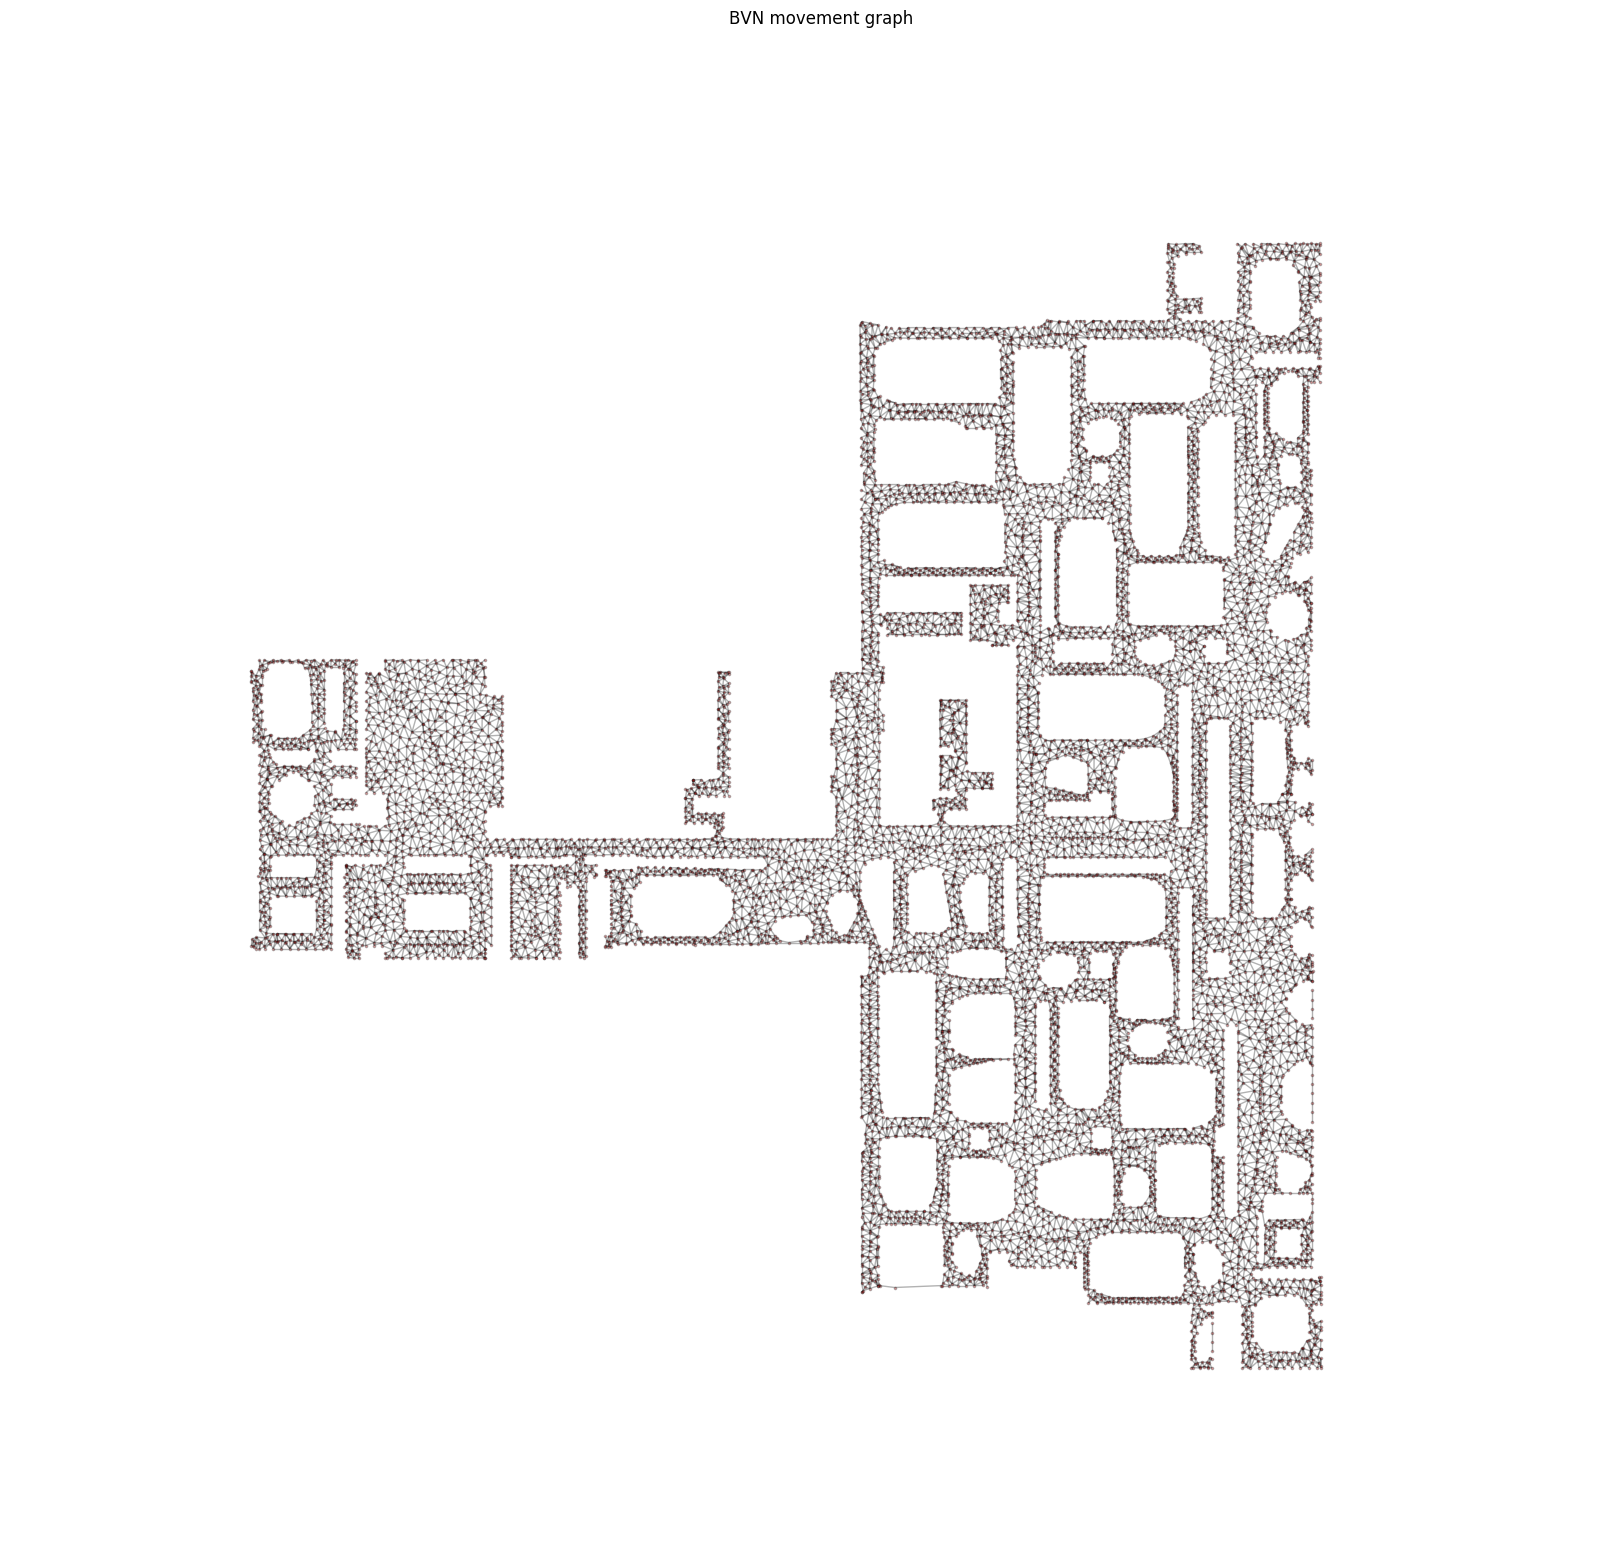

In [4]:
pos = {n[0]: (n[1]["x"], n[1]["y"]) for n in OG.nodes(data=True)}
nx.draw(OG, alpha=0.3, s=1, pos=pos, node_shape=".", node_size=10)
plt.title("BVN movement graph");

It seems from the graph below that some sections of the graph are disjoint. Check this with the real data once we have it!

In [5]:
# nx.draw(OG, alpha=0.3, s=1, node_shape=".", node_size=30)

In [6]:
def read_boundaries(file_name):
    f = open(file_name, 'r')
    verts = f.readlines()
    f.close()
    edges = [eval(v) for v in verts]
    return edges

inner = read_boundaries("inner_boundaries.wires")
isovist = read_boundaries("isovist_boundaries.wires")
outer = read_boundaries("outer_boundaries.wires")

To see why the graph goes where it does it's helpful to put some context in.

_TODO: inner and isovist are sharing the same data for some reason. Reexport it from GH and get it right!_

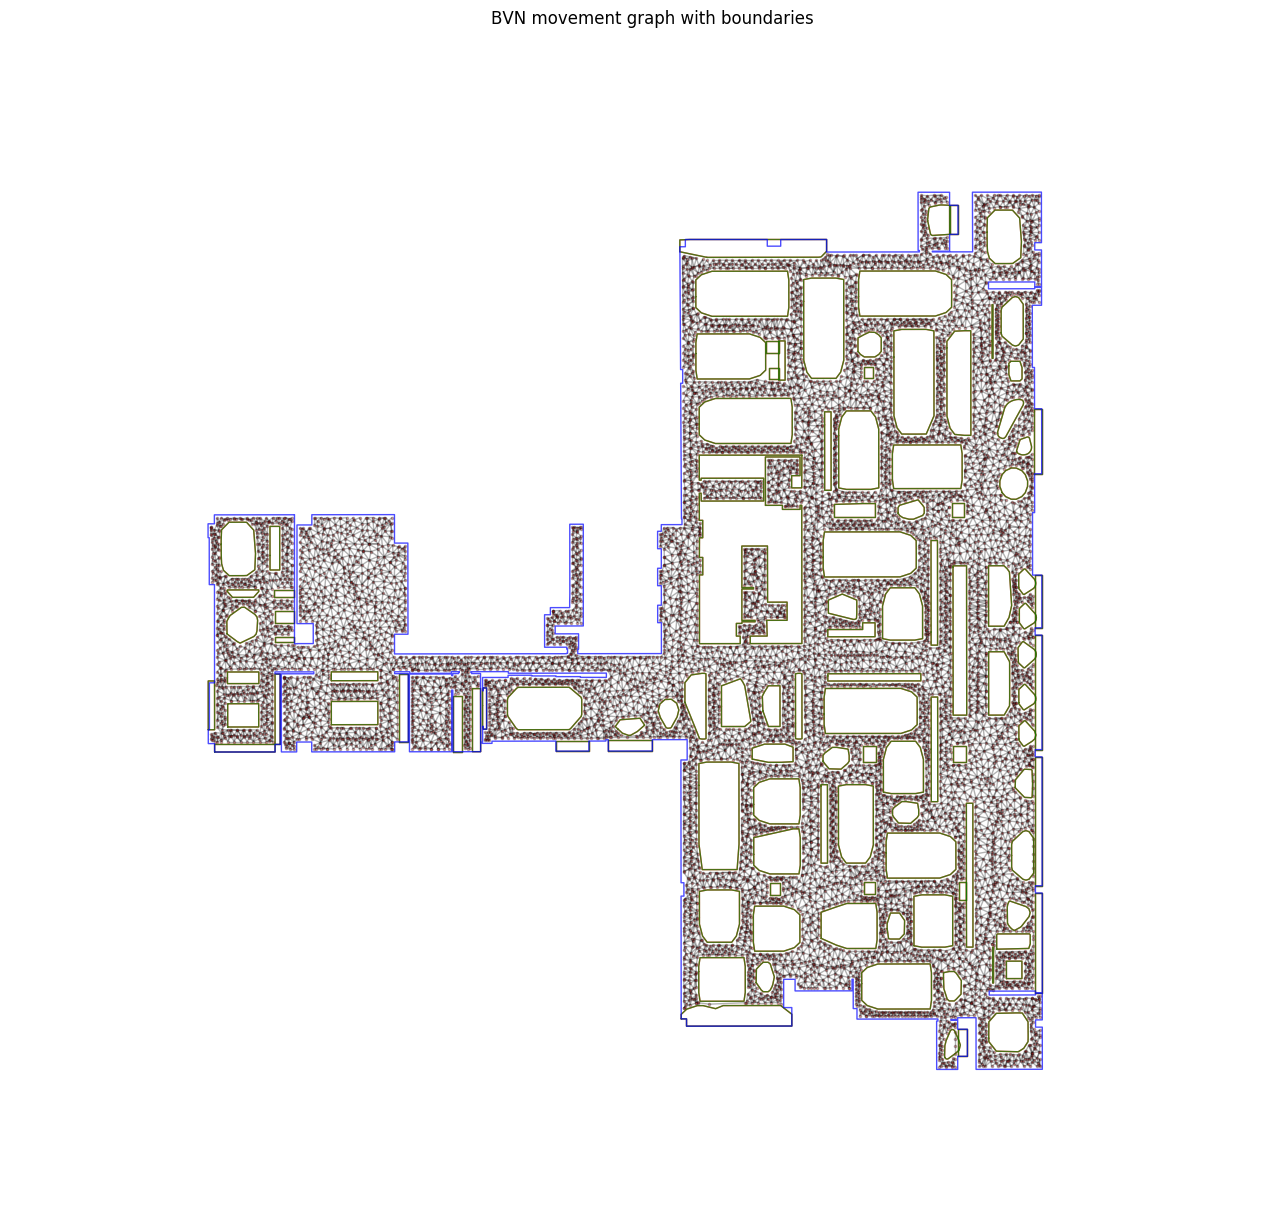

In [13]:
def plot_line(ob, colour="r"):
    x, y = ob.xy
    plt.plot(x, y, color=colour, alpha=0.7, linewidth=1, solid_capstyle='round', zorder=2)

for boundary_set, colour in [(inner, "r"),(isovist, "g"),(outer, "b")]:
    for e in boundary_set:
        ring = LinearRing(e)
        plot_line(ring, colour)
    

nx.draw(OG, alpha=0.3, s=1, pos=pos, node_shape=".", node_size=10)
plt.title("BVN movement graph with boundaries");

In [ ]:
# TODO: add sticker locations
# TODO: add base locations